<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/cl_hc_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

# **Hierarchical Clustering**

## **Carga de bibliotecas necesarias**

### **Para el tratamiento de los datos**

In [1]:
import pandas as pd
import numpy as np

### **Para gráficos**

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

### **Para preprocesamiento de datos y modelo**

In [3]:
import sklearn
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score

## **Extracción de Datos - Creación del DataFrame**

In [4]:
datos = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/Clientes.csv"

In [5]:
clientes = pd.read_csv(datos)
clientes

,ID,Trabajo,Edad,Salario,Compra
0,15624510,1,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No
...,...,...,...,...,...
395,15691863,0,46,41000,Si
396,15706071,1,51,23000,Si
397,15654296,0,50,20000,Si
398,15755018,1,36,33000,No


El dataframe contiene 5 variables y 400 observaciones. 

Las variables indican:
- **ID:** La identificación del cliente
- **Trabajo:** Corresponde 1 cuando es dependiente y 0 cuando es independiente
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

Pero para el desarrollo del algoritmo se simplificara a un problema bidimensional, seleccionando las variables de edad y salario.

## **Eliminando variables**

In [6]:
clientes.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Trabajo  400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
clientes = clientes.drop(columns=["ID", "Trabajo", "Compra"]) #se elimina la variable no relevante
clientes #vista del dataframe

,Edad,Salario
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


# **Evaluando el Algoritmo**

## **Algoritmo Hierarchical Clustering**

In [8]:
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [9]:
ac.fit(clientes)

AgglomerativeClustering(n_clusters=4)

In [10]:
labels = ac.labels_

In [11]:
labels

array([0, 0, 0, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       2, 0, 2, 0, 3, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2,
       2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 3, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 3, 1, 2, 0, 0, 2, 2, 0, 2, 3, 0, 2, 1, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 2, 3, 2, 1, 0, 3, 1, 3, 0, 1, 3, 0, 2, 0, 1, 2, 2, 1, 3,
       2, 2, 3, 1, 2, 0, 1, 3, 2, 2, 3, 0, 1, 2, 1, 2, 2, 2, 2, 3, 3, 2,
       2, 1, 2, 3, 0, 1, 0, 1, 0, 0, 3, 3, 0, 2, 2, 2, 1, 3, 2, 3, 1, 2,
       2, 1, 2, 2, 3, 2, 3, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 3, 2,
       2, 3, 2, 2, 3, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0,

## **Métricas**

### **Calinski Harabasz**

In [12]:
metrics.calinski_harabasz_score(clientes, labels)

1249.6394834936352

In [21]:
round(metrics.calinski_harabasz_score(clientes, labels), 2)

1249.64

### **Silhouette**

In [13]:
metrics.silhouette_score(clientes, labels)

0.5782347409293481

### **Davies Bouldin**

In [14]:
metrics.davies_bouldin_score(clientes, labels)

0.4756912440471305

## **Graficos**

In [15]:
clientes["cluster"] = labels

In [16]:
clientes.head(3)

,Edad,Salario,cluster
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [17]:
fig = px.scatter(clientes, 
                 x = "Edad", 
                 y = "Salario",
                 title = "Hierarchical Clustering",
                 template = "gridon",
                 color = "cluster")
fig.show()

### **Dendrograma**

In [18]:
clientes.head(3)

,Edad,Salario,cluster
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [19]:
clientes.drop(columns = "cluster", inplace=True)

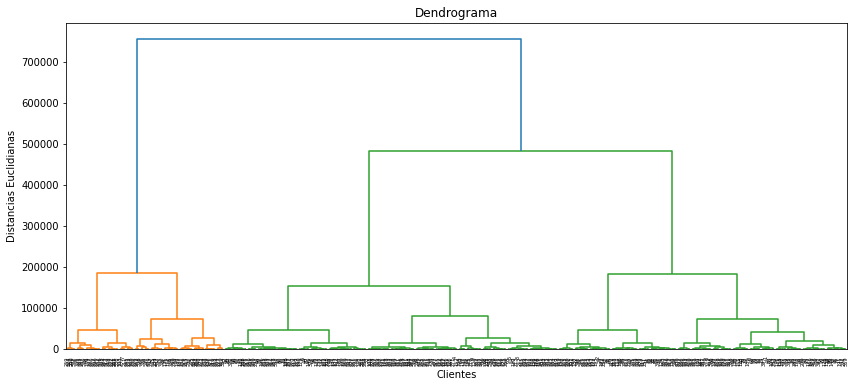

In [20]:
plt.figure(figsize=(14, 6))

dendrogram = sch.dendrogram(sch.linkage(clientes, method = "ward"))

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')

plt.show()